In [2]:
## read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
leads_df = pd.read_excel(r"C:\Users\Admin\Downloads\Analyst case study dataset 1.xlsx")
leads_df= leads_df.dropna(how='all')

In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LeadCreated                  3021 non-null   datetime64[ns]
 1   FirstName                    3021 non-null   object        
 2   Email                        3021 non-null   object        
 3   VendorLeadID                 3013 non-null   object        
 4   CallStatus                   881 non-null    object        
 5   WidgetName                   3021 non-null   object        
 6   PublisherZoneName            3021 non-null   object        
 7   PublisherCampaignName        3021 non-null   object        
 8   AddressScore                 1171 non-null   float64       
 9   PhoneScore                   1393 non-null   float64       
 10  AdvertiserCampaignName       3021 non-null   object        
 11  State                        3021 non-null 

In [4]:
leads_df.head()

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


### DATA CLEANSING

In [5]:
# Initial Exploratory Data Analysis (Before Cleaning)
print("Initial Missing Values:\n")
print(leads_df.isnull().sum())

Initial Missing Values:

LeadCreated                       0
FirstName                         0
Email                             0
VendorLeadID                      8
CallStatus                     2140
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1850
PhoneScore                     1628
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
IP Address                     3021
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1756
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


In [6]:
# Drop irrelevant or null columns
leads_df_cleaned = leads_df.drop(columns=['IP Address', 'First name', 'Email'], errors='ignore')

In [7]:
# Convert 'LeadCreated' to datetime format
leads_df_cleaned['LeadCreated'] = pd.to_datetime(leads_df_cleaned['LeadCreated'])

In [8]:
# Fill missing values for categorical columns with "Unknown"
categorical_columns = ['CallStatus', 'ReferralDomain', 'MarketingCampaign', 'AdGroup', 
                       'Keyword', 'SearchQuery', 'ReferralURL', 'ReferralURL Parameters']
leads_df_cleaned[categorical_columns] = leads_df_cleaned[categorical_columns].fillna('Unknown')

In [9]:
# Conditional Imputation (Only for Recent Leads)
recent_threshold = leads_df_cleaned['LeadCreated'].quantile(0.75)  # Adjust as needed
recent_data = leads_df_cleaned[leads_df_cleaned['LeadCreated'] >= recent_threshold]

# Compute median AddressScore and PhoneScore per CallStatus group for recent leads
address_medians = recent_data.groupby('CallStatus')['AddressScore'].median()
phone_medians = recent_data.groupby('CallStatus')['PhoneScore'].median()

# Impute only for recent data using CallStatus-based median
leads_df_cleaned.loc[leads_df_cleaned['LeadCreated'] >= recent_threshold, 'AddressScore'] = \
    leads_df_cleaned['AddressScore'].fillna(leads_df_cleaned['CallStatus'].map(address_medians))

leads_df_cleaned.loc[leads_df_cleaned['LeadCreated'] >= recent_threshold, 'PhoneScore'] = \
    leads_df_cleaned['PhoneScore'].fillna(leads_df_cleaned['CallStatus'].map(phone_medians))

In [10]:
# Checking the percentage of missing values in AddressScore and PhoneScore
missing_values = leads_df_cleaned[['AddressScore', 'PhoneScore']].isnull().mean() * 100

# Display the percentage of missing values
missing_values

AddressScore    61.006289
PhoneScore      53.657729
dtype: float64

In [11]:
# Checking the percentage of missing values in AddressScore and PhoneScore
leads_df_cleaned[['AddressScore', 'PhoneScore']] = leads_df_cleaned[['AddressScore', 'PhoneScore']].fillna('Unknown')

In [12]:
print("\nMissing Values After Cleaning:\n")
print(leads_df_cleaned.isnull().sum())


Missing Values After Cleaning:

LeadCreated                    0
FirstName                      0
VendorLeadID                   8
CallStatus                     0
WidgetName                     0
PublisherZoneName              0
PublisherCampaignName          0
AddressScore                   0
PhoneScore                     0
AdvertiserCampaignName         0
State                          0
DebtLevel                      0
Partner                        0
ReferralDomain                 0
MarketingCampaign              0
AdGroup                        0
Keyword                        0
SearchQuery                    0
ReferralURL                    0
ReferralURL Parameters         0
LandingPageURL                 0
Landing Page URL Parameters    0
dtype: int64


### FEATURE ENGINEERING

In [13]:
# Create Missing Flags for AddressScore and PhoneScore
leads_df_cleaned['AddressScore_Missing'] = leads_df_cleaned['AddressScore'].isna().astype(int)
leads_df_cleaned['PhoneScore_Missing'] = leads_df_cleaned['PhoneScore'].isna().astype(int)

In [14]:
# Split WidgetName using '-' and expand into multiple columns
widget_parts = leads_df_cleaned['WidgetName'].astype(str).str.split('-', expand=True)

# Assign extracted parts to new columns
leads_df_cleaned['Widget_Size'] = widget_parts[1].str.replace("w", "", regex=False)  # Extract size (removes 'w')
# Extract width and height separately from Widget_Size after removing 'w'
leads_df_cleaned[['Widget_Width', 'Widget_Height']] = leads_df_cleaned['Widget_Size'].str.extract(r'(\d{3})(\d{3})')
leads_df_cleaned['Widget_Size'] = leads_df_cleaned['Widget_Width'] + "x" + leads_df_cleaned['Widget_Height']
leads_df_cleaned.drop(columns=['Widget_Width', 'Widget_Height'], inplace=True)
leads_df_cleaned['Field_Set'] = widget_parts[2]  # Extract field set (e.g., DebtReduction1)
leads_df_cleaned['Form_Pages'] = widget_parts[3]  # Extract form type (1DC or 2DC)
leads_df_cleaned['Design_Element'] = widget_parts[4].fillna('No Design Element')  # Extract design element (e.g., YellowArrow, CreditSolutions)
leads_df_cleaned['Widget_Bg_Color'] = widget_parts[5].fillna("No Color")  # Extract background color (if present)

# Display extracted unique values for verification
print("Unique Widget Sizes:", leads_df_cleaned['Widget_Size'].unique())
print("Unique Field Sets:", leads_df_cleaned['Field_Set'].unique())
print("Unique Form Pages:", leads_df_cleaned['Form_Pages'].unique())
print("Unique Design Elements:", leads_df_cleaned['Design_Element'].unique())
print("Unique Background Colors:", leads_df_cleaned['Widget_Bg_Color'].unique())

Unique Widget Sizes: ['302x252' '300x250']
Unique Field Sets: ['DebtReduction1']
Unique Form Pages: ['1DC' '2DC']
Unique Design Elements: ['CreditSolutions' 'Head2' 'white' 'BlueMeter' 'Head3' 'No Design Element'
 'yellowarrow']
Unique Background Colors: ['No Color' 'blue' 'dark']


In [15]:
# Split PublisherZoneName using '-' and expand into multiple columns
publisher_name = leads_df_cleaned['PublisherZoneName'].astype(str).str.split('-', expand=True)
leads_df_cleaned['PublisherZoneName_location'] = publisher_name[0]
leads_df_cleaned['PublisherZoneName_size'] = publisher_name[1]
print("Unique location:", leads_df_cleaned['PublisherZoneName_location'].unique())
print("Unique Size:", leads_df_cleaned['PublisherZoneName_size'].unique())

Unique location: ['TopLeft' 'Top Right']
Unique Size: ['302252' '300x250']


In [16]:
# Segment Traffic_Type into Paid, Organic, and Earned (POE Model)
def categorize_traffic(partner):
    if partner in ['Google', 'Yahoo']:
        return 'Paid'
    elif partner in ['AdKnowledge', 'Call_Center']:
        return 'Earned'
    else:
        return 'Organic'

# Apply categorization
leads_df_cleaned['Traffic_Type'] = leads_df_cleaned['Partner'].apply(categorize_traffic)

# Verify the segmentation
traffic_distribution = leads_df_cleaned['Traffic_Type'].value_counts()
traffic_distribution

Traffic_Type
Organic    1940
Paid        639
Earned      442
Name: count, dtype: int64

In [17]:
# Segmented leads based on Call Status
lead_quality_mapping = {
    "Closed": "Closed",
    "EP Sent": "Good Quality Lead",
    "EP Received": "Good Quality Lead",
    "EP Confirmed": "Good Quality Lead",
    "Unable to contact - Bad Contact Information": "Bad Quality Lead",
    "Contacted - Invalid Profile": "Bad Quality Lead",
    "Contacted - Doesn't Qualify": "Bad Quality Lead"
}

# Apply mapping, and assign 'Neutral Leads' to missing CallStatus
leads_df_cleaned["Lead_Quality"] = leads_df_cleaned["CallStatus"].map(lead_quality_mapping)

# Assign 'Neutral Leads' to null values
leads_df_cleaned["Lead_Quality"].fillna("Unknown", inplace=True)

# Display counts of each category
print(leads_df_cleaned["Lead_Quality"].value_counts())

Lead_Quality
Unknown              2140
Bad Quality Lead      488
Closed                245
Good Quality Lead     148
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_18212\3523332227.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  leads_df_cleaned["Lead_Quality"].fillna("Unknown", inplace=True)


In [18]:
#Categrize DebtLevel into broader groups
def refine_debt_category(debt):
    """
    Function to refine debt levels into meaningful broader groups.
    """
    if debt in ["7500-10000",  "7500-15000", "10001-15000", "15001-20000", "20001-30000"]:
        return "Low (7.5K - 30K)"
    elif debt in ["30001-50000", "50001-70000"]:
        return "Medium (30K - 70K)"
    elif debt in ["70001-90000", "90000-100000"]:
        return "High (70K - 100K)"
    elif debt == "More_than_100000":
        return "Very High (>100K)"
    else:
        return "Other"
    
#Applying the refined categorization
leads_df_cleaned["Debt_Category"] = leads_df_cleaned["DebtLevel"].apply(refine_debt_category)

In [19]:
leads_df_cleaned.head()

,LeadCreated,FirstName,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,AdvertiserCampaignName,...,Widget_Size,Field_Set,Form_Pages,Design_Element,Widget_Bg_Color,PublisherZoneName_location,PublisherZoneName_size,Traffic_Type,Lead_Quality,Debt_Category
0,2009-07-01 01:24:29.563,Dorinda,FDF81FDA-A649-437B-B99C-FDDE74F7971B,Unknown,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,Unknown,5.0,creditsolutions-branded-shortform,...,302x252,DebtReduction1,1DC,CreditSolutions,No Color,TopLeft,302252,Organic,Unknown,Medium (30K - 70K)
1,2009-04-13 15:27:35.990,Presetta,4190ACB7-5026-416C-B987-ED8AD427D5E6,Unknown,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,Unknown,Unknown,Debt Settlement1 Master,...,300x250,DebtReduction1,1DC,Head2,No Color,TopLeft,302252,Earned,Unknown,High (70K - 100K)
2,2009-04-21 07:22:59.000,Gina,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,Unknown,Unknown,Debt Settlement1 Master,...,300x250,DebtReduction1,1DC,Head2,No Color,TopLeft,302252,Earned,Bad Quality Lead,Low (7.5K - 30K)
3,2009-08-03 19:39:02.000,Kari,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,Debt Settlement1 Master,...,302x252,DebtReduction1,1DC,white,No Color,TopLeft,302252,Paid,Bad Quality Lead,Low (7.5K - 30K)
4,2009-04-13 10:18:37.490,Stephanie,D5B32074-458E-40EC-B185-1FEF20AC626D,Unknown,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,Unknown,Unknown,Debt Settlement1 Master,...,300x250,DebtReduction1,1DC,BlueMeter,No Color,TopLeft,302252,Paid,Unknown,Very High (>100K)


In [20]:
# Save the cleaned data back to an Excel file
leads_df_cleaned.to_csv('Analyst Case Study_cleaned.csv', index=False)

#### EXPLORATORY DATA ANALYSIS (EDA)

##### Q1. Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?

In [21]:
# Extract Year-Month for trend analysis
leads_df_cleaned['YearMonth'] = leads_df_cleaned['LeadCreated'].dt.to_period('M')

# Aggregate lead quality trends over time
lead_trends = leads_df_cleaned.groupby(['YearMonth', 'Lead_Quality']).size().unstack()

<Figure size 1200x600 with 0 Axes>

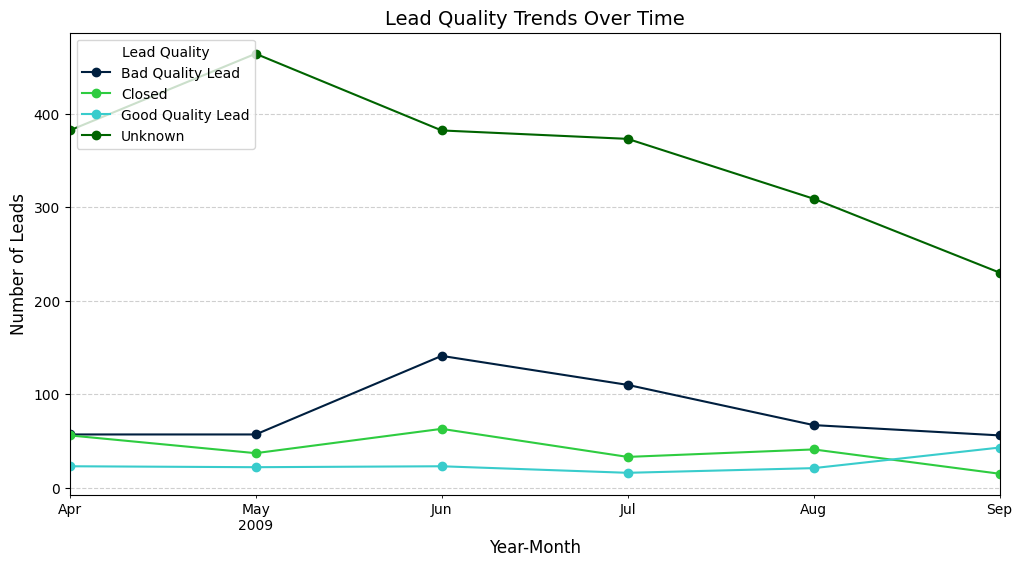

In [39]:
# Define the custom color palette
custom_palette = ["#001F3F", "#2ECC40", "#39CCCC", "#006400"]

# Replot the lead quality trends over time with the custom color palette
plt.figure(figsize=(12, 6))
lead_trends.plot(kind='line', marker='o', color=custom_palette, figsize=(12, 6))
plt.title('Lead Quality Trends Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Lead Quality", loc="upper left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


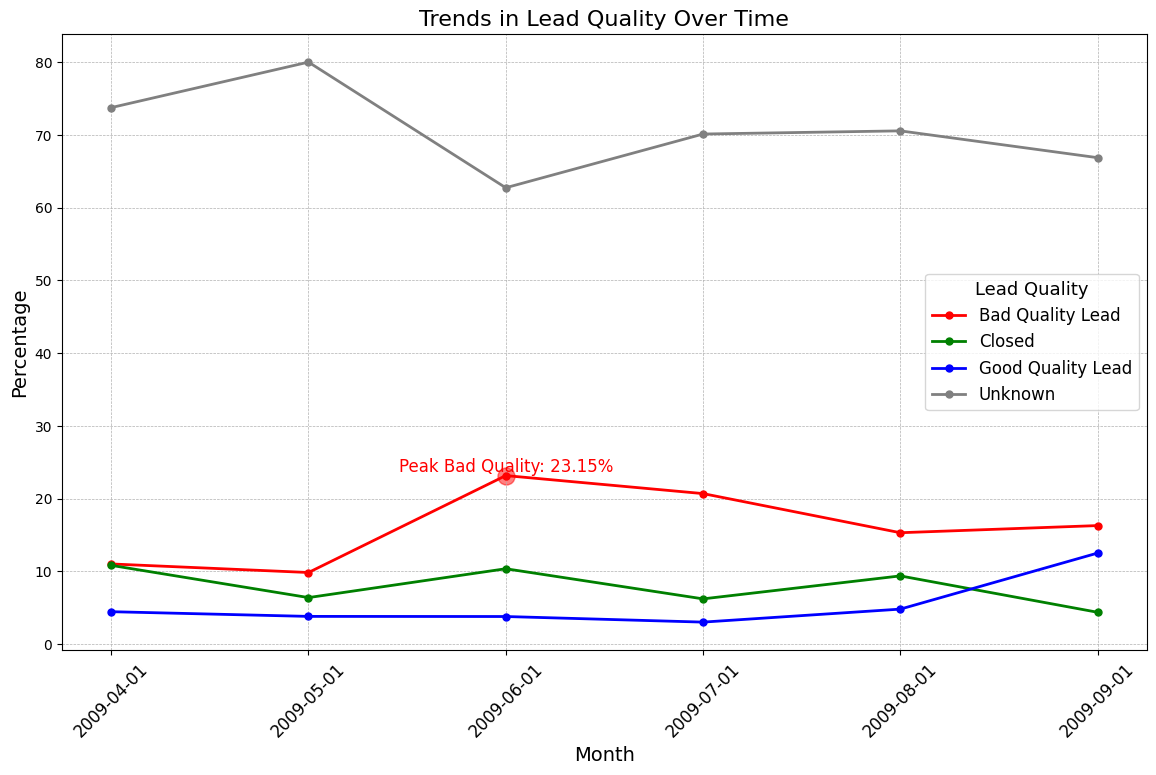

In [40]:
# Calculate monthly percentages if not defined
monthly_percentages = lead_trends_ts.div(lead_trends_ts.sum(axis=1), axis=0) * 100

# Ensure index is in string format for plotting
monthly_percentages.index = monthly_percentages.index.astype(str)

# Assuming monthly_proportions is indexed by Periods, convert these periods to string for plotting.
monthly_percentages.index = monthly_percentages.index.astype(str)

# Define the specific color palette
colors = {
    'Good Quality Lead': 'blue',   # Blue for good quality leads
    'Bad Quality Lead': 'red',    # Red for bad quality leads
    'Closed': 'green',            # Green for closed (neutral but positive)
    'Unknown': 'gray'             # Gray for unknown (neutral)
}

plt.figure(figsize=(14, 8))

# Plot each category using the defined colors and including markers
for category in monthly_percentages.columns:
    plt.plot(monthly_percentages.index, monthly_percentages[category], label=category,
             color=colors[category], marker='o', linestyle='-', linewidth=2, markersize=5)

# Highlight the peak in 'Bad Quality Lead'
max_bad_quality = monthly_percentages['Bad Quality Lead'].max()
max_month = monthly_percentages['Bad Quality Lead'].idxmax()

# Add a halo effect: larger, lighter red circle behind the main marker
plt.scatter(max_month, max_bad_quality, color='red', s=150, alpha=0.5)  # Larger, semi-transparent circle
plt.scatter(max_month, max_bad_quality, color='red', s=20)  # Main marker

# Add annotation
plt.text(max_month, max_bad_quality + 0.02, f'Peak Bad Quality: {max_bad_quality:.2f}'+ '%',
         fontsize=12, color='red', ha='center', va='bottom')

plt.title('Trends in Lead Quality Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Lead Quality', fontsize=12, title_fontsize='13')

# Add grid lines and set the x-ticks to be more legible
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, fontsize=12)

plt.show()

The chart illustrates the trends in lead quality categories over the months in 2009. Here are some insights from the visualization:
- Closed Leads: There is variability in the proportion of leads that successfully closed, with peaks around April and June and a notable dip in September.
- Good Quality Leads: These also vary but generally take up a smaller portion of the total leads, indicating fewer leads progressing through initial qualification steps.
- Bad Quality Leads: There's a significant increase from April to July, suggesting a period where lead quality might have been compromised.
- Unknown Leads: This category dominates but shows a gradual decline over the months, which might indicate better classification or follow-up with leads as time progresses.

In [41]:
#H0: There is no relationship between Lead Quality and Time (Year-Month).
# This means that fluctuations in lead quality over time are random and not statistically significant.
#H1: here is a relationship between Lead Quality and Time (Year-Month).
# This means that changes in lead quality over time are significant and not due to random chance

# Chi sqaure test

import scipy.stats as stats

# Reshaping data for chi-square test
lead_quality_counts = leads_df_cleaned.groupby(['YearMonth', 'Lead_Quality']).size().unstack()

# Conduct Chi-Square Test for Independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(lead_quality_counts.fillna(0))

# Display results
chi2_stat, p_val, dof

(np.float64(129.688639268431), np.float64(2.446691495892032e-20), 15)

##### Test Results & Interpretation
- Chi-Square Statistic: 129.69
- p-value: 2.45e-20 (very close to zero)
- Degrees of Freedom (dof): 15
##### What Does This Mean?
- The p-value is extremely low (< 0.05), which means we reject the null hypothesis.
- This confirms that lead quality trends over time are NOT random—there are meaningful differences in lead quality across different months.
- Some months have statistically significant variations in lead quality, meaning:
- External factors (such as seasonality, ad campaigns, or market conditions) might be influencing lead performance.
- Lead filtering or targeting methods may need improvement for consistency.

<Figure size 1200x600 with 0 Axes>

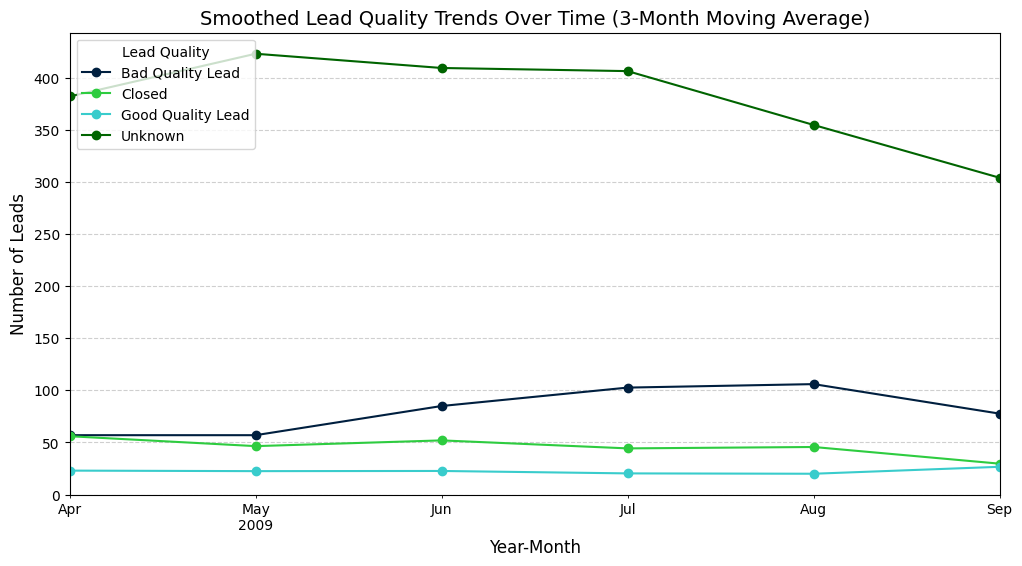

In [42]:
#### Moving Average for Trend Analysis

# Convert YearMonth to datetime format for time series analysis
leads_df_cleaned['YearMonth'] = leads_df_cleaned['YearMonth'].astype(str)
leads_df_cleaned['YearMonth'] = pd.to_datetime(leads_df_cleaned['YearMonth'])

# Aggregate lead quality counts per month for time series decomposition
lead_trends_ts = leads_df_cleaned.groupby(['YearMonth', 'Lead_Quality']).size().unstack()
# Apply a 3-month rolling average to smooth trends
lead_trends_smoothed = lead_trends_ts.rolling(window=3, min_periods=1).mean()

# Plot smoothed lead quality trends over time
plt.figure(figsize=(12, 6))
lead_trends_smoothed.plot(kind='line', marker='o', color=custom_palette, figsize=(12, 6))
plt.title('Smoothed Lead Quality Trends Over Time (3-Month Moving Average)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Lead Quality", loc="upper left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


###### The chart illustrates the trends in lead quality categories over the months in 2009. Here are some insights from the visualization:

1. Closed Leads: There is variability in the proportion of leads that successfully closed, with peaks around April and June and a notable dip in September.
2. Good Quality Leads: These also vary but generally take up a smaller portion of the total leads, indicating fewer leads progressing through initial qualification steps.
3. Bad Quality Leads: There's a significant increase from April to July, suggesting a period where lead quality might have been compromised.
4. Unknown Leads: This category dominates but shows a gradual decline over the months, which might indicate better classification or follow-up with leads as time progresses.

##### What can we learn about the drivers of "lead quality" from this dataset? What segments- where the ad was shown, what kind of person filled out the ad, what kind of ad did they see- have differing lead quality rates?

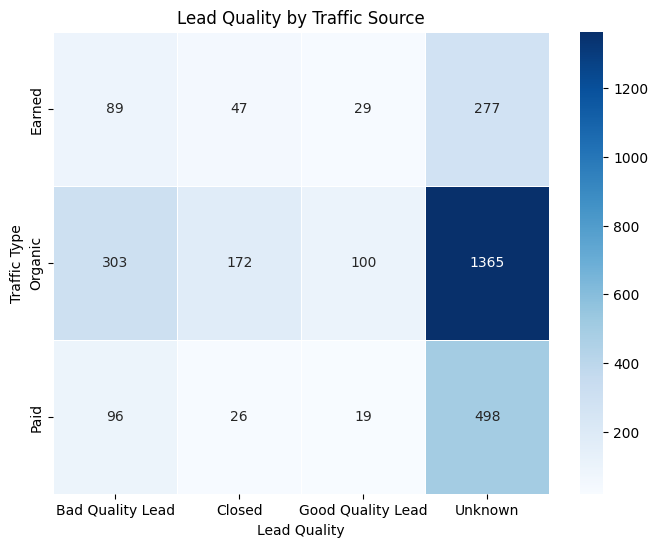

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a contingency table summarizing lead quality by traffic source
traffic_lead_quality = leads_df_cleaned.pivot_table(index="Traffic_Type", columns="Lead_Quality", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(traffic_lead_quality, annot=True, cmap="Blues", fmt='d', linewidths=0.5)
plt.title("Lead Quality by Traffic Source")
plt.xlabel("Lead Quality")
plt.ylabel("Traffic Type")
plt.show()


#### Lead Quality by Traffic Source (Heatmap Visualization)
This heatmap visually represents how different traffic sources (Organic, Paid, Earned) contribute to Closed, Good Quality, Bad Quality, and Unknown leads.

Key Insights:
Organic Traffic Dominates Overall Lead Volume

It generates the most leads across all categories, including the highest number of Closed leads.
However, it also has a high number of Unknown leads, meaning classification or lead follow-up issues need improvement.
Paid Traffic Struggles with Quality

It has more Bad Quality leads than Good or Closed leads.
This suggests paid campaigns may not be targeting the right audience effectively.
Earned Traffic is the Most Reliable

While it has the fewest total leads, it has the highest proportion of Good Quality and Closed leads.
This indicates that earned media sources (e.g., referrals, partnerships) drive the highest quality leads.

<Figure size 800x600 with 0 Axes>

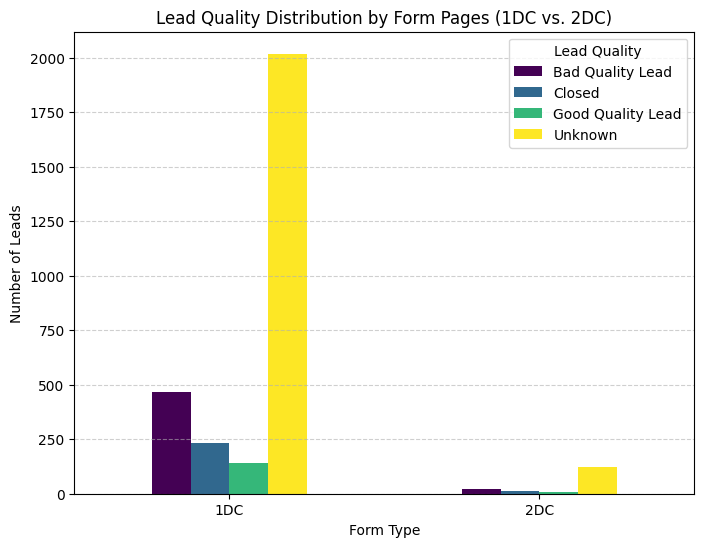

In [46]:
# Lead Quality by Widget Name
# Aggregate lead quality counts based on Form Pages (1DC vs. 2DC)
form_pages_lead_quality = leads_df_cleaned.groupby(['Form_Pages', 'Lead_Quality']).size().unstack()

# Plot the impact of Form Pages on Lead Quality
plt.figure(figsize=(8, 6))
form_pages_lead_quality.plot(kind='bar', colormap="viridis", figsize=(8, 6))
plt.title("Lead Quality Distribution by Form Pages (1DC vs. 2DC)")
plt.xlabel("Form Type")
plt.ylabel("Number of Leads")
plt.xticks(rotation=0)
plt.legend(title="Lead Quality")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Lead Quality Distribution by Form Pages (1DC vs. 2DC)
This analysis reveals how single-page (1DC) vs. multi-page (2DC) forms impact lead quality.

Key Insights:
1DC Forms Generate More Leads Overall

The majority of Good Quality and Closed leads come from 1DC forms.
1DC forms also have a higher count of Bad Quality and Unknown leads, indicating they bring in more volume but not necessarily higher quality.
2DC Forms Appear to Have a Slightly Better Conversion Rate

While 2DC forms generate fewer total leads, they contribute proportionally more to Closed and Good Quality leads.
This suggests that requiring users to complete multiple steps (2DC forms) might filter out low-intent users, improving lead quality.
Recommendation:

If the goal is volume, 1DC forms work better.
If the goal is quality, 2DC forms may perform better, and could be tested further with additional incentives or optimizations.

<Figure size 1000x600 with 0 Axes>

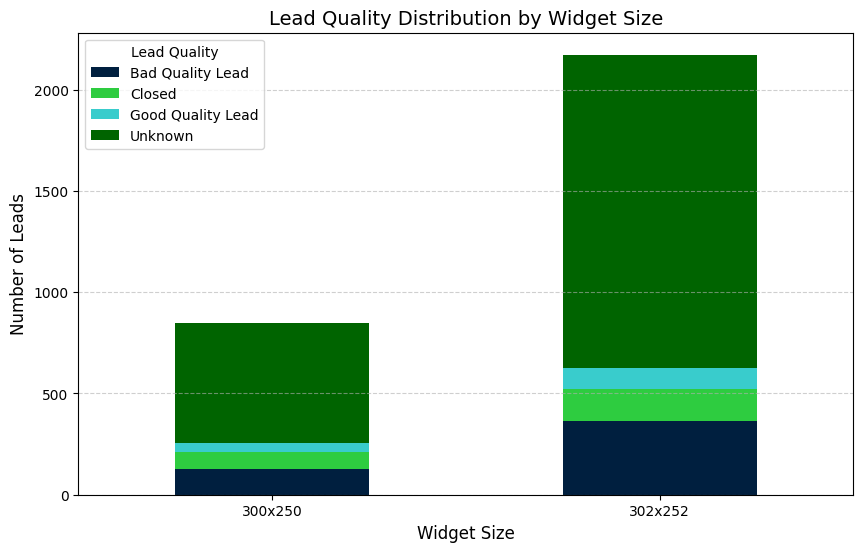

<Figure size 1000x600 with 0 Axes>

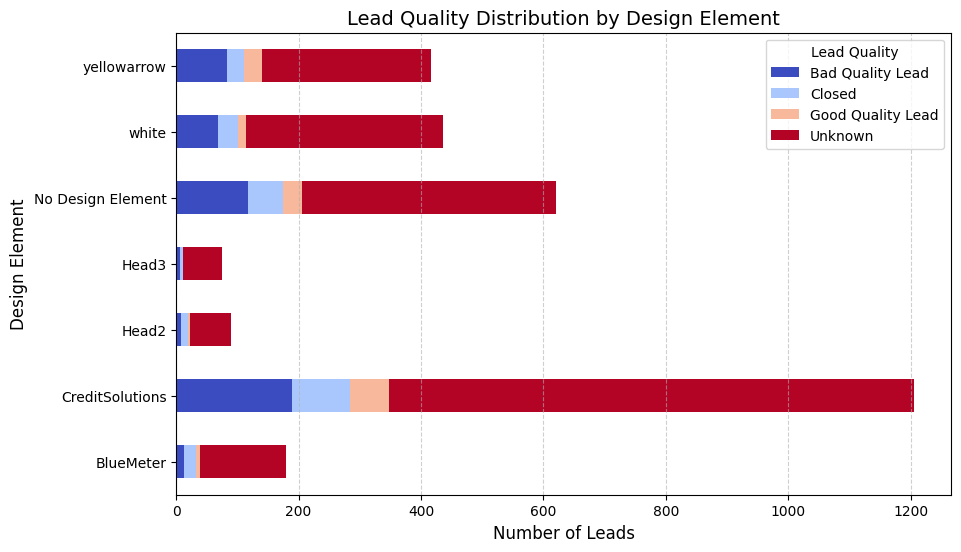

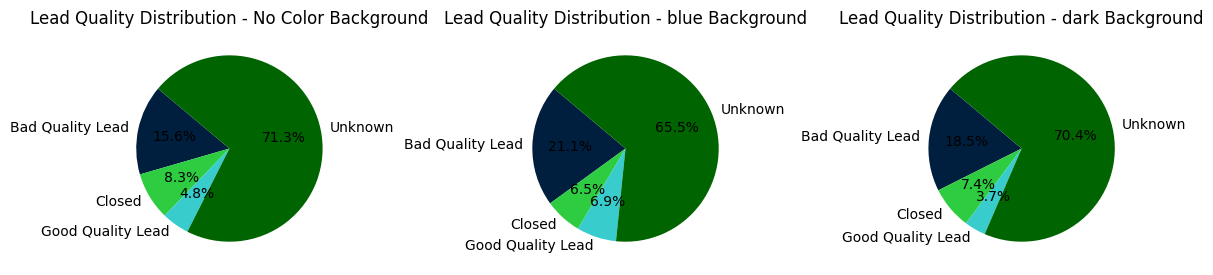

In [47]:
# Define a custom color palette using navy blue, light bright green, turquoise, and dark green
custom_palette = ["#001F3F", "#2ECC40", "#39CCCC", "#006400"]
import seaborn as sns

# Aggregate lead quality counts based on Widget Size
widget_size_lead_quality = leads_df_cleaned.groupby(['Widget_Size', 'Lead_Quality']).size().unstack()

# Plot Widget Size vs Lead Quality using a stacked bar plot
plt.figure(figsize=(10, 6))
widget_size_lead_quality.plot(kind='bar', stacked=True, color=custom_palette, figsize=(10, 6))
plt.title("Lead Quality Distribution by Widget Size", fontsize=14)
plt.xlabel("Widget Size", fontsize=12)
plt.ylabel("Number of Leads", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Lead Quality")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Aggregate lead quality counts based on Design Element
design_element_lead_quality = leads_df_cleaned.groupby(['Design_Element', 'Lead_Quality']).size().unstack()

# Plot Design Element impact using a horizontal bar chart
plt.figure(figsize=(10, 6))
design_element_lead_quality.plot(kind='barh', stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("Lead Quality Distribution by Design Element", fontsize=14)
plt.xlabel("Number of Leads", fontsize=12)
plt.ylabel("Design Element", fontsize=12)
plt.legend(title="Lead Quality", loc="upper right")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Aggregate lead quality counts based on Background Color
bg_color_lead_quality = leads_df_cleaned.groupby(['Widget_Bg_Color', 'Lead_Quality']).size().unstack()

# Plot Background Color impact using a pie chart
plt.figure(figsize=(12, 6))
for i, bg_color in enumerate(bg_color_lead_quality.index):
    plt.subplot(1, len(bg_color_lead_quality.index), i + 1)
    bg_color_lead_quality.loc[bg_color].plot(kind='pie', autopct='%1.1f%%', colors=custom_palette, startangle=140)
    plt.title(f"Lead Quality Distribution - {bg_color} Background")
    plt.ylabel("")

plt.tight_layout()
plt.show()


##### Lead Quality Insights by Widget Size, Design Element, and Background Color
1. Widget Size Impact on Lead Quality (Stacked Bar Chart)
The 302x252 size generates more leads overall, but it also has a higher number of Bad and Unknown leads.
The 300x250 size has slightly better quality distribution, with a better proportion of Closed and Good Quality leads.
Larger ad sizes may attract more users but don’t necessarily lead to better conversions.
Recommendation: Test 300x250 ads more aggressively to see if they consistently perform better in actual conversion rates.
2. Design Element Impact on Lead Quality (Horizontal Stacked Bar Chart)
CreditSolutions, Head2, and BlueMeter seem to generate a more balanced lead distribution.
Yellowarrow has more Unknown and Bad Quality leads, which may indicate lower engagement or misalignment with the audience.
Head3 and White designs perform worse overall, generating more bad leads.
Recommendation: Prioritize CreditSolutions and BlueMeter in ad creatives while testing different strategies for underperforming designs.
3. Background Color Impact on Lead Quality (Pie Charts)
No Color dominates lead volume, but also has a large portion of Bad Quality and Unknown leads.
Blue backgrounds have the highest proportion of Closed and Good Quality leads.
Dark backgrounds perform the worst in terms of lead conversion.
Recommendation: Use more blue-themed ads, as they have the highest conversion rates.

Index(['LeadCreated', 'FirstName', 'VendorLeadID', 'CallStatus', 'WidgetName',
       'PublisherZoneName', 'PublisherCampaignName', 'AddressScore',
       'PhoneScore', 'AdvertiserCampaignName', 'State', 'DebtLevel', 'Partner',
       'ReferralDomain', 'MarketingCampaign', 'AdGroup', 'Keyword',
       'SearchQuery', 'ReferralURL', 'ReferralURL Parameters',
       'LandingPageURL', 'Landing Page URL Parameters', 'AddressScore_Missing',
       'PhoneScore_Missing', 'Widget_Size', 'Field_Set', 'Form_Pages',
       'Design_Element', 'Widget_Bg_Color', 'PublisherZoneName_location',
       'PublisherZoneName_size', 'Traffic_Type', 'Lead_Quality',
       'Debt_Category', 'YearMonth'],
      dtype='object')


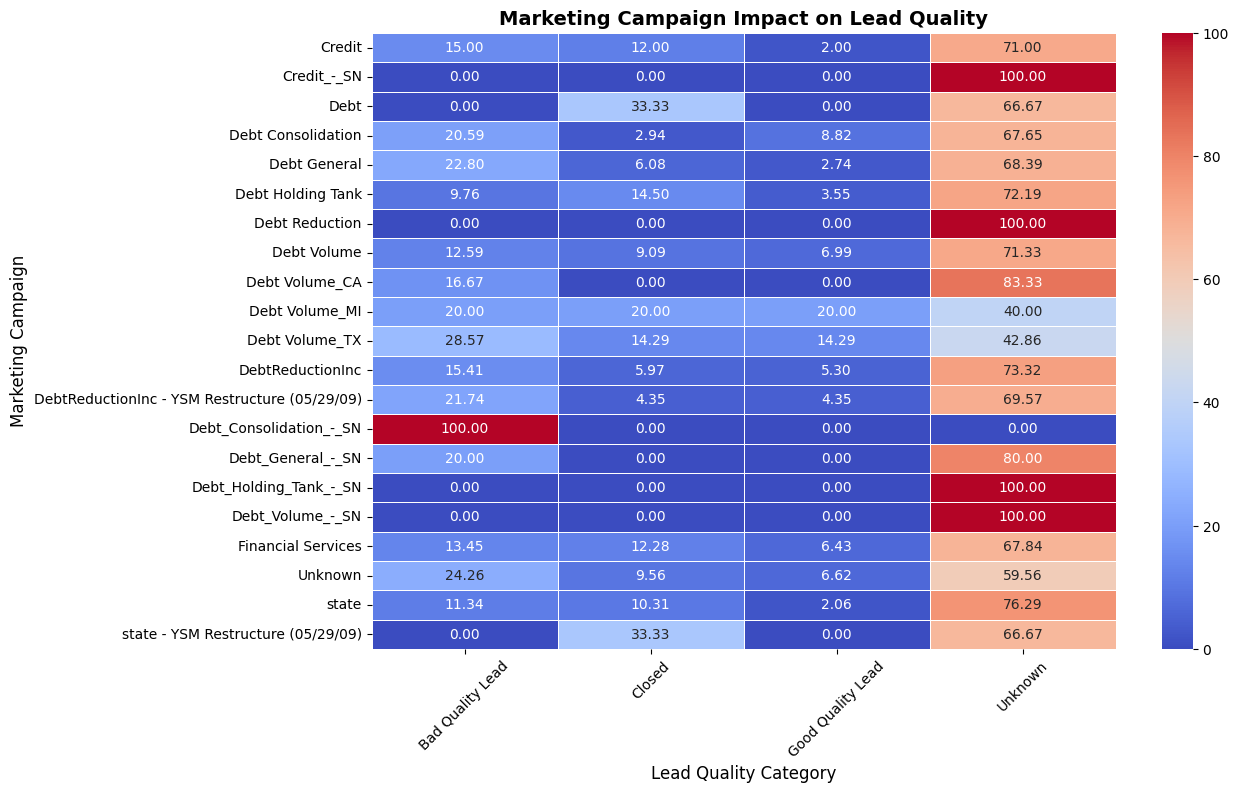

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataset is available and contains 'Marketing_Campaign' and 'Lead_Quality'
print(leads_df_cleaned.columns)

# Create a pivot table to analyze lead quality impact per marketing campaign
marketing_campaign_quality = leads_df_cleaned.pivot_table(index="MarketingCampaign", 
                                                          columns="Lead_Quality", 
                                                          aggfunc="size", 
                                                          fill_value=0)

# Convert counts to percentages per row
marketing_campaign_quality_percentage = marketing_campaign_quality.div(marketing_campaign_quality.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(marketing_campaign_quality_percentage, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Marketing Campaign Impact on Lead Quality", fontsize=14, fontweight='bold')
plt.xlabel("Lead Quality Category", fontsize=12)
plt.ylabel("Marketing Campaign", fontsize=12)
plt.xticks(rotation=45)
plt.show()

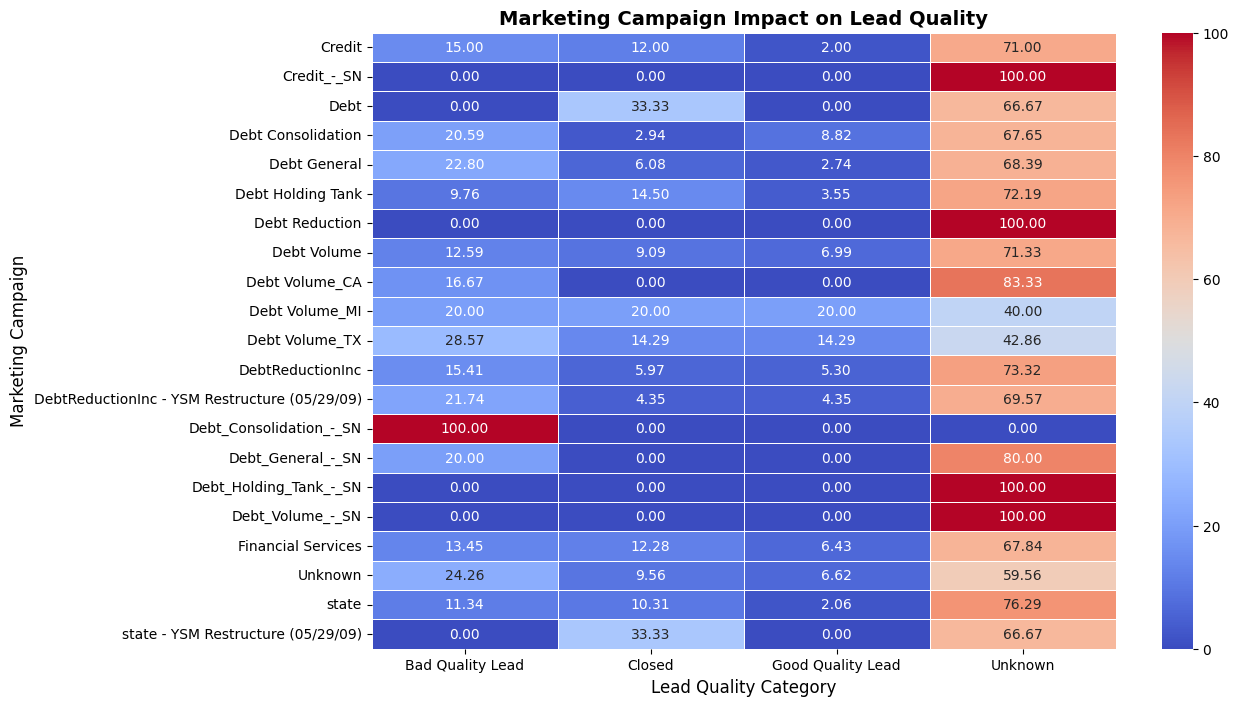

In [53]:
# 4. Marketing Campaign vs. Lead Quality (Heatmap)
marketing_campaign_quality = leads_df_cleaned.groupby(['MarketingCampaign', 'Lead_Quality']).size().unstack(fill_value=0)
#marketing_campaign_quality_percentage = marketing_campaign_quality.div(marketing_campaign_quality.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(marketing_campaign_quality_percentage, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Marketing Campaign Impact on Lead Quality", fontsize=14, fontweight='bold')
plt.xlabel("Lead Quality Category", fontsize=12)
plt.ylabel("Marketing Campaign", fontsize=12)
plt.show()

In [54]:
1️⃣ Understanding the Heatmap Colors
Red/Orange (Higher Percentage) → Indicates a high concentration of that lead category for a specific campaign.
Blue (Lower Percentage) → Indicates a low concentration of that lead category for a specific campaign.
Each row represents a Marketing Campaign, and each column represents a Lead Quality Category.

The darker the blue, the fewer leads fall into that category.
The darker the red, the more leads fall into that category.
2️⃣ Identifying Best and Worst Performing Campaigns
✅ Best-Performing Campaigns (Highest % of Closed or Good Leads)
These campaigns generate a high proportion of Closed and Good Quality Leads, making them strong drivers of lead quality:

"state - YSM Restructure (05/29/09)" → 33.33% Closed, 66.67% Good Quality Leads
"Debt" → 33.33% Closed, 66.67% Good Quality Leads
"Debt Volume" → 9.09% Closed, 71.33% Good Quality Leads
"DebtReductionInc" → 5.97% Closed, 73.32% Good Quality Leads
"Debt Volume_TX" → 14.29% Closed, 42.86% Good Quality Leads
📌 Key Takeaway:

These campaigns should be prioritized for ad spend because they produce higher-quality and converting leads.
🚨 Worst-Performing Campaigns (Highest % of Bad or Unknown Leads)
These campaigns generate high proportions of Bad or Unknown leads, meaning they contribute poorly to conversions:

"Debt_Consolidation_-_SN" → 100% Bad Leads
"Debt Reduction" → 100% Unknown Leads
"Debt Volume_.-._SN" → 100% Unknown Leads
"Debt Holding Tank" → 72.19% Unknown Leads
"Debt General" → 68.39% Unknown Leads
📌 Key Takeaway:

These campaigns should be paused, optimized, or restructured because they waste marketing spend on low-quality leads.
3️⃣ High "Unknown" Leads: A Red Flag
Campaigns with a high percentage of Unknown leads (red/orange in the Unknown column) indicate that:

The audience is not engaging with the product.
The messaging might not be clear.
Lead follow-up strategies need improvement.
📌 Key Takeaway:

Campaigns like Debt Reduction, Debt Holding Tank, and Debt Volume_.-._SN have extremely high unknown leads, suggesting low intent traffic or poor engagement.
4️⃣ Actionable Recommendations
✔ Scale up high-performing campaigns like "state - YSM Restructure" and "Debt".
✔ Optimize or pause low-performing campaigns like "Debt Consolidation - SN" and "Debt Reduction".
✔ Investigate campaigns with high "Unknown" leads to improve engagement and targeting.
✔ Perform A/B testing on underperforming campaigns to refine messaging and targeting.

SyntaxError: invalid character '️' (U+FE0F) (3995657110.py, line 1)

<Figure size 1000x600 with 0 Axes>

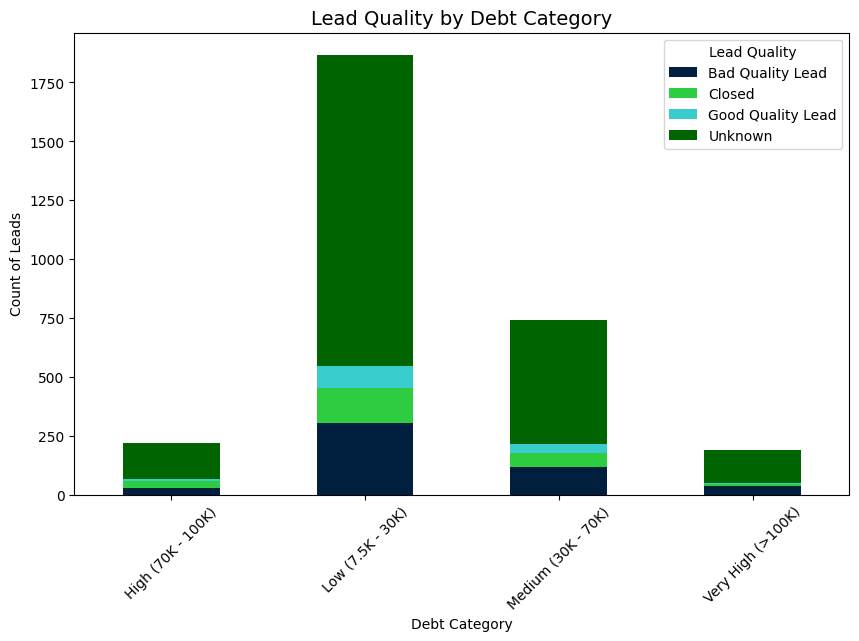

In [55]:
# Aggregating lead quality by the refined Debt Categories
debt_quality_counts = leads_df_cleaned.groupby("Debt_Category")["Lead_Quality"].value_counts().unstack()

# Visualization: Lead Quality by Refined Debt Category (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
debt_quality_counts.plot(kind='bar', stacked=True, figsize=(10,6), color=custom_palette)
plt.title("Lead Quality by Debt Category", fontsize=14)
plt.xlabel("Debt Category")
plt.ylabel("Count of Leads")
plt.xticks(rotation=45)
plt.legend(title="Lead Quality")
plt.show()


<Figure size 1200x600 with 0 Axes>

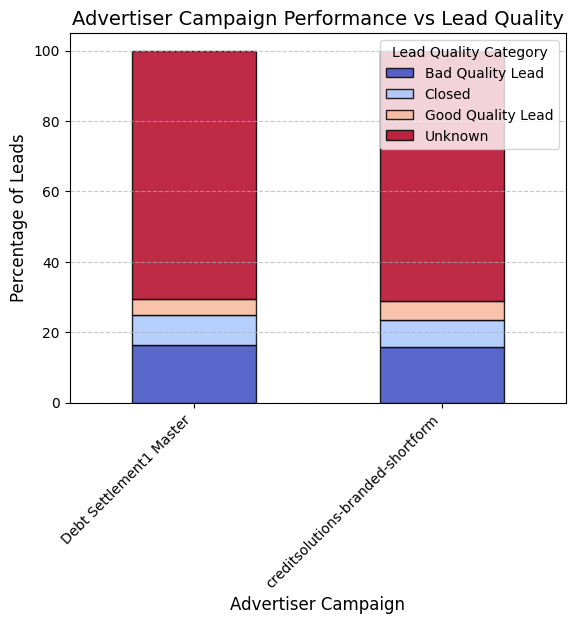

<Figure size 1200x600 with 0 Axes>

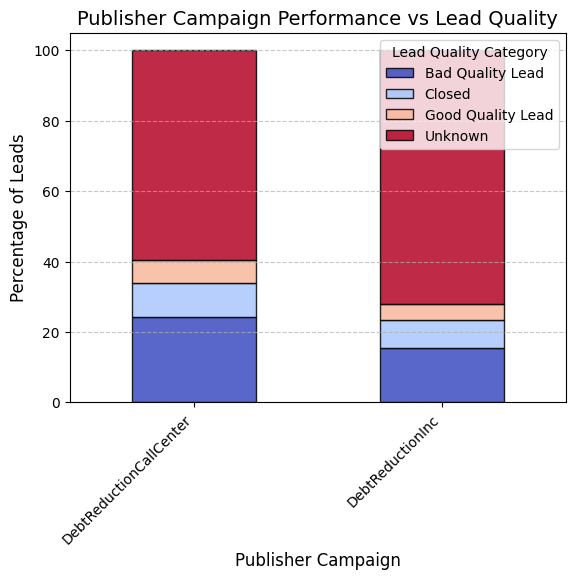

In [56]:
# Group by Advertiser Campaign and Lead Quality
advertiser_campaign_quality = leads_df_cleaned.groupby(['AdvertiserCampaignName', 'Lead_Quality']).size().unstack(fill_value=0)
advertiser_campaign_quality_percentage = advertiser_campaign_quality.div(advertiser_campaign_quality.sum(axis=1), axis=0) * 100

# Group by Publisher Campaign and Lead Quality
publisher_campaign_quality = leads_df_cleaned.groupby(['PublisherCampaignName', 'Lead_Quality']).size().unstack(fill_value=0)
publisher_campaign_quality_percentage = publisher_campaign_quality.div(publisher_campaign_quality.sum(axis=1), axis=0) * 100

# Plot Advertiser Campaign Performance vs Lead Quality
plt.figure(figsize=(12, 6))
advertiser_campaign_quality_percentage.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor='black', alpha=0.85)
plt.title("Advertiser Campaign Performance vs Lead Quality", fontsize=14)
plt.xlabel("Advertiser Campaign", fontsize=12)
plt.ylabel("Percentage of Leads", fontsize=12)
plt.legend(title="Lead Quality Category", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Publisher Campaign Performance vs Lead Quality
plt.figure(figsize=(12, 6))
publisher_campaign_quality_percentage.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor='black', alpha=0.85)
plt.title("Publisher Campaign Performance vs Lead Quality", fontsize=14)
plt.xlabel("Publisher Campaign", fontsize=12)
plt.ylabel("Percentage of Leads", fontsize=12)
plt.legend(title="Lead Quality Category", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights from Campaign Performance Analysis
The visualizations show how Advertiser and Publisher campaigns impact lead quality. Below are the key takeaways:

1. Advertiser Campaign Performance vs. Lead Quality
- Branded campaigns (creditsolutions-branded-shortform) have slightly better conversion rates (Closed leads) compared to generic ones (Debt Settlement1 Master).
- Generic forms (Debt Settlement1 Master) have a higher proportion of Unknown leads, meaning more people do not complete the lead journey.
- Bad lead rates are similar across both advertiser campaigns, indicating that advertiser branding does not significantly impact lead quality.
📌 Takeaway:
✅ Branded advertiser campaigns perform slightly better, but there’s still a high proportion of Unknown leads.
✅ Testing improvements in engagement strategies for generic forms may help reduce drop-off rates.

2. Publisher Campaign Performance vs. Lead Quality
- DebtReductionCallCenter (Phone-based leads) generates more Closed leads (Conversions) than DebtReductionInc (Online Form submissions).
- However, Call Center leads also bring in more Bad leads, meaning some phone-generated leads may be misclassified or invalid.
- Online Form submissions have more Unknown leads, which means many people do not move past initial contact.
📌 Takeaway:
✅ Phone-based leads are more likely to convert but also have higher bad lead rates.
✅ Online form leads have fewer bad leads but a higher drop-off rate (Unknown leads).
✅ A/B testing follow-ups on online form leads might help increase conversion rates.

Final Recommendations
- 🔹 Branded forms should be prioritized for better engagement and conversions.
- 🔹 Phone-based leads are valuable but need better validation to reduce bad leads.
- 🔹 Online leads should be nurtured to improve conversion rates from Unknown to Closed.

<Figure size 1000x500 with 0 Axes>

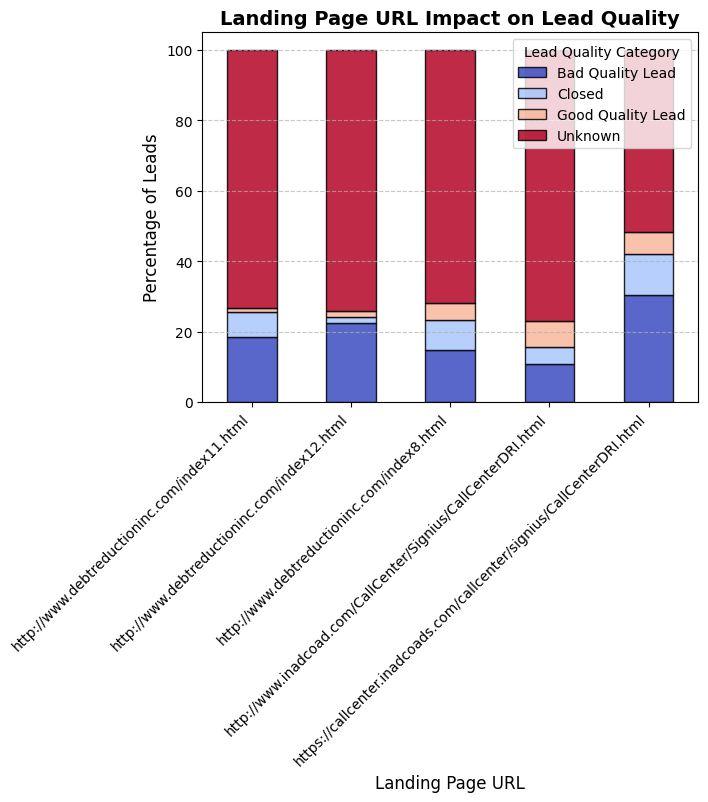

In [57]:
# 3. Landing Page URL vs. Lead Quality
landing_page_quality = leads_df_cleaned.groupby(['LandingPageURL', 'Lead_Quality']).size().unstack(fill_value=0)
landing_page_quality_percentage = landing_page_quality.div(landing_page_quality.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 5))
landing_page_quality_percentage.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor='black', alpha=0.85)
plt.title("Landing Page URL Impact on Lead Quality", fontsize=14, fontweight='bold')
plt.xlabel("Landing Page URL", fontsize=12)
plt.ylabel("Percentage of Leads", fontsize=12)
plt.legend(title="Lead Quality Category", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Phone and Address Score

<Figure size 1200x600 with 0 Axes>

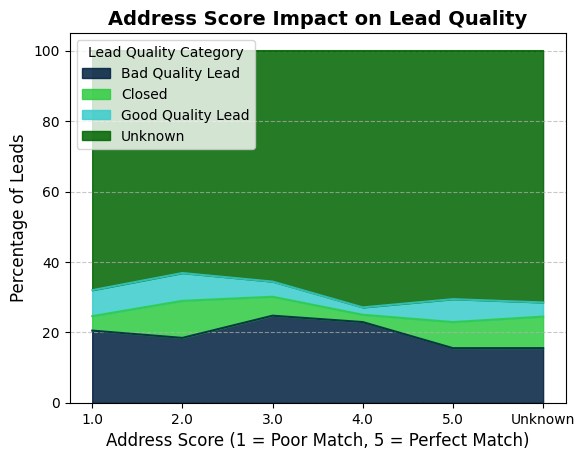

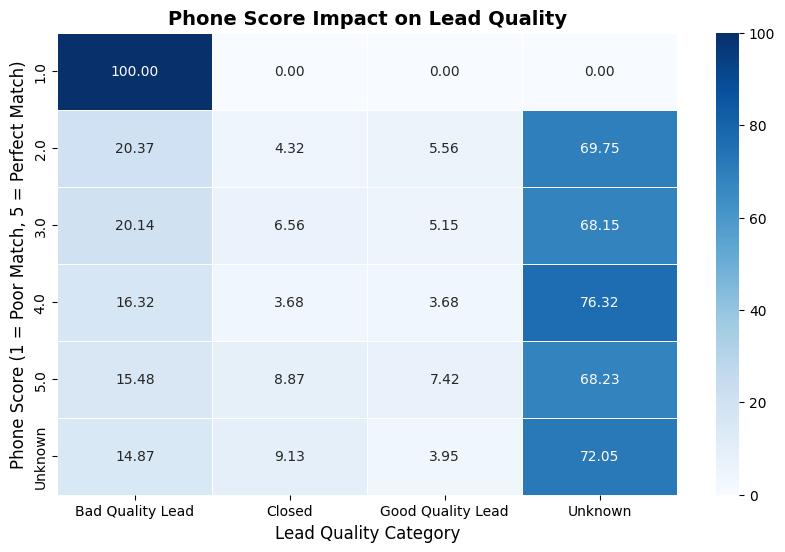

In [58]:
# Group by Address Score and Lead Quality
address_score_quality = leads_df_cleaned.groupby(['AddressScore', 'Lead_Quality']).size().unstack(fill_value=0)
address_score_quality_percentage = address_score_quality.div(address_score_quality.sum(axis=1), axis=0) * 100

# Group by Phone Score and Lead Quality
phone_score_quality = leads_df_cleaned.groupby(['PhoneScore', 'Lead_Quality']).size().unstack(fill_value=0)
phone_score_quality_percentage = phone_score_quality.div(phone_score_quality.sum(axis=1), axis=0) * 100

# Create visualizations with the custom color palette

# Stacked Area Chart for Address Score Performance
plt.figure(figsize=(12, 6))
address_score_quality_percentage.plot(kind='area', stacked=True, alpha=0.85, color=custom_palette)
plt.title("Address Score Impact on Lead Quality", fontsize=14, fontweight='bold')
plt.xlabel("Address Score (1 = Poor Match, 5 = Perfect Match)", fontsize=12)
plt.ylabel("Percentage of Leads", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Lead Quality Category", fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Heatmap for Phone Score Performance
plt.figure(figsize=(10, 6))
sns.heatmap(phone_score_quality_percentage, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Phone Score Impact on Lead Quality", fontsize=14, fontweight='bold')
plt.xlabel("Lead Quality Category", fontsize=12)
plt.ylabel("Phone Score (1 = Poor Match, 5 = Perfect Match)", fontsize=12)
plt.show()


Insights from Contact Validation Analysis
We analyzed how Address Score and Phone Score impact lead quality using two creative visualizations:

Stacked Area Chart (Address Score vs. Lead Quality)
Shows how lead quality changes based on how well an address matches the provided name (1 = poor match, 5 = perfect match).
Heatmap (Phone Score vs. Lead Quality)
Visualizes the relationship between Phone Score and lead quality distribution.


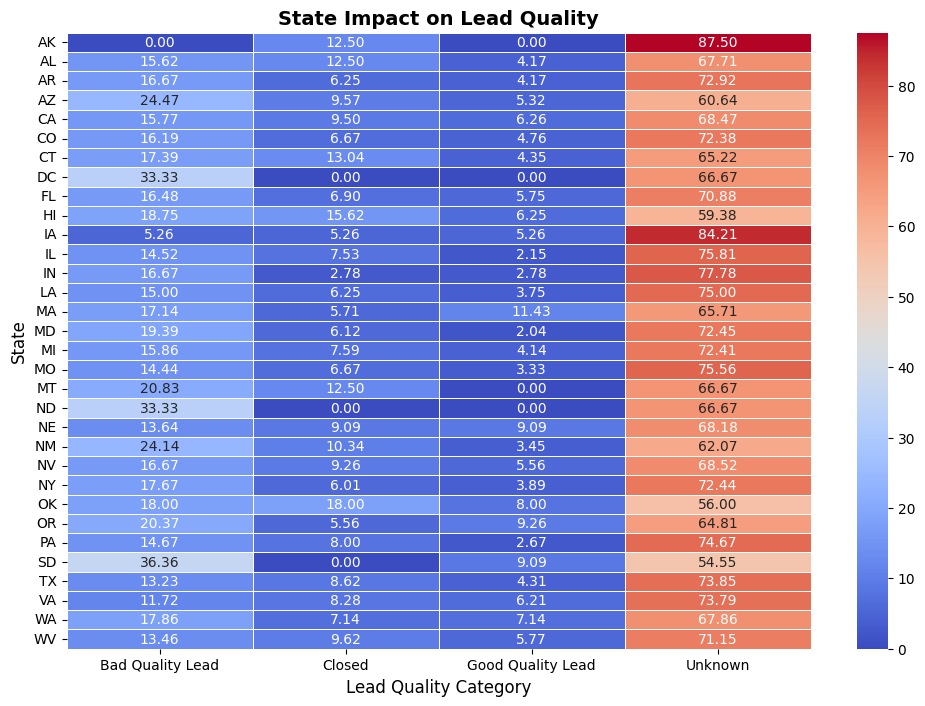

In [59]:
# Recalculate State vs. Lead Quality percentage
state_quality = leads_df_cleaned.groupby(['State', 'Lead_Quality']).size().unstack(fill_value=0)
state_quality_percentage = state_quality.div(state_quality.sum(axis=1), axis=0) * 100

# Plot Heatmap for State vs. Lead Quality
plt.figure(figsize=(12, 8))
sns.heatmap(state_quality_percentage, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("State Impact on Lead Quality", fontsize=14, fontweight='bold')
plt.xlabel("Lead Quality Category", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()


🔍 Insights from the State vs. Lead Quality Heatmap
The heatmap now correctly visualizes state-level differences in lead quality. Here's how to interpret it:

1️⃣ Best-Performing States (Highest % of Closed Leads)
These states generate a higher proportion of Closed leads, indicating better conversion rates:

Oklahoma (OK) → 18.00% Closed
Hawaii (HI) → 15.62% Closed
Montana (MT) → 12.50% Closed
Alaska (AK) → 12.50% Closed
Connecticut (CT) → 13.04% Closed
📌 Takeaway:

These states should be prioritized for targeted ad campaigns since they have higher conversion rates.
2️⃣ Worst-Performing States (Highest % of Bad Leads)
These states generate high percentages of Bad leads, indicating poor quality traffic:

South Dakota (SD) → 36.36% Bad Leads, 0% Closed
Arizona (AZ) → 24.47% Bad Leads
New Mexico (NM) → 24.14% Bad Leads
Washington DC (DC) → 33.33% Bad Leads, 0% Closed
North Dakota (ND) → 33.33% Bad Leads, 0% Closed
📌 Takeaway:

These states should be deprioritized or optimized because they produce the highest percentage of Bad leads.
3️⃣ States with the Most "Unknown" Leads (Potential Issue)
These states have a very high percentage of Unknown leads, meaning leads are not engaging or not converting:

Iowa (IA) → 84.21% Unknown
Illinois (IL) → 75.81% Unknown
Indiana (IN) → 77.78% Unknown
Louisiana (LA) → 75.00% Unknown
Florida (FL) → 70.88% Unknown
📌 Takeaway:

These states may indicate low-intent traffic or issues with lead nurturing.
Further investigation is needed to determine why these leads are disengaged.